In [11]:
!pip install kaggle

In [12]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [16]:
with_mask = os.listdir('/content/data/with_mask')
print(with_mask[0:5]) #Print first five picture name
print(with_mask[-5:]) #Print last five picture name

['with_mask_3480.jpg', 'with_mask_609.jpg', 'with_mask_2521.jpg', 'with_mask_1110.jpg', 'with_mask_2414.jpg']
['with_mask_1873.jpg', 'with_mask_420.jpg', 'with_mask_3116.jpg', 'with_mask_3114.jpg', 'with_mask_163.jpg']


In [17]:
without_mask = os.listdir('/content/data/without_mask')
print(without_mask[0:5]) #Print first five picture name
print(without_mask[-5:]) #Print last five picture name

['without_mask_2685.jpg', 'without_mask_1896.jpg', 'without_mask_39.jpg', 'without_mask_3261.jpg', 'without_mask_2190.jpg']
['without_mask_1923.jpg', 'without_mask_403.jpg', 'without_mask_3062.jpg', 'without_mask_1610.jpg', 'without_mask_3824.jpg']


In [18]:
print(len(with_mask))
print(len(without_mask))

3725
3828


In [19]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [20]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [21]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [22]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


# **Displying The Images**

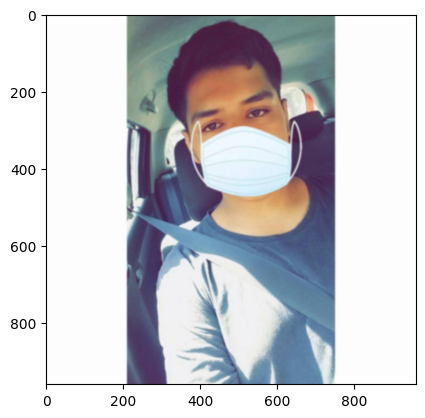

In [23]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1896.jpg')
imgplot = plt.imshow(img)
plt.show()

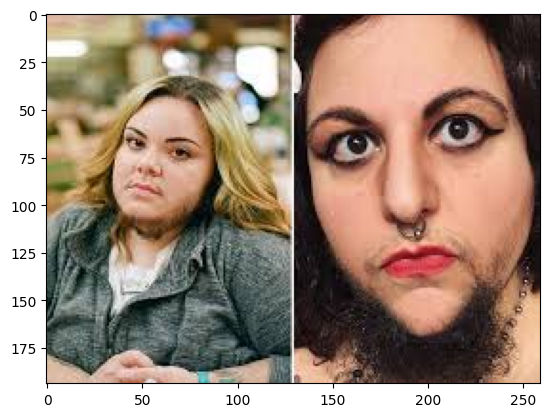

In [24]:
 #displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_3062.jpg')
imgplot = plt.imshow(img)
plt.show()

# **Image processing**

In [25]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
type(data)

list

In [27]:
len(data)

7553

array([[[177, 155, 132],
        [182, 160, 137],
        [186, 166, 142],
        ...,
        [221, 208, 189],
        [223, 213, 193],
        [216, 202, 183]],

       [[175, 153, 130],
        [180, 157, 135],
        [183, 162, 138],
        ...,
        [213, 200, 181],
        [215, 205, 185],
        [208, 194, 175]],

       [[171, 148, 125],
        [176, 151, 129],
        [179, 155, 131],
        ...,
        [207, 194, 174],
        [214, 203, 183],
        [206, 192, 173]],

       ...,

       [[ 19,  16,  20],
        [ 20,  19,  26],
        [ 49,  49,  55],
        ...,
        [ 82,  67,  51],
        [ 94,  74,  53],
        [116,  89,  68]],

       [[ 18,  17,  18],
        [ 16,  14,  17],
        [ 31,  30,  35],
        ...,
        [ 85,  67,  48],
        [109,  86,  63],
        [112,  84,  62]],

       [[ 19,  18,  19],
        [ 16,  14,  17],
        [ 21,  20,  25],
        ...,
        [ 93,  70,  50],
        [117,  89,  65],
        [108,  76,  51]]], dtype=uint8)
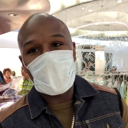

In [28]:
data[0]

In [29]:
data[0].shape

(128, 128, 3)

In [30]:
type(data[0])

numpy.ndarray

In [31]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [32]:
type(X)
type(Y)

numpy.ndarray

In [33]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Splitting Data**

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [36]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 54,  62,  75],
        [ 54,  62,  75],
        [ 53,  61,  74],
        ...,
        [ 71,  83, 102],
        [ 71,  82, 102],
        [ 70,  81, 101]],

       [[ 52,  60,  73],
        [ 53,  61,  74],
        [ 52,  60,  73],
        ...,
        [ 71,  84, 103],
        [ 71,  83, 103],
        [ 70,  82, 101]],

       [[ 51,  59,  71],
        [ 53,  61,  73],
        [ 52,  60,  72],
        ...,
        [ 71,  85, 104],
        [ 71,  85, 104],
        [ 70,  84, 103]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
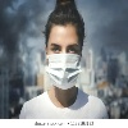

In [37]:
X_train[0]

In [38]:
X_train_scaled[0]

array([[[0.21176471, 0.24313725, 0.29411765],
        [0.21176471, 0.24313725, 0.29411765],
        [0.20784314, 0.23921569, 0.29019608],
        ...,
        [0.27843137, 0.3254902 , 0.4       ],
        [0.27843137, 0.32156863, 0.4       ],
        [0.2745098 , 0.31764706, 0.39607843]],

       [[0.20392157, 0.23529412, 0.28627451],
        [0.20784314, 0.23921569, 0.29019608],
        [0.20392157, 0.23529412, 0.28627451],
        ...,
        [0.27843137, 0.32941176, 0.40392157],
        [0.27843137, 0.3254902 , 0.40392157],
        [0.2745098 , 0.32156863, 0.39607843]],

       [[0.2       , 0.23137255, 0.27843137],
        [0.20784314, 0.23921569, 0.28627451],
        [0.20392157, 0.23529412, 0.28235294],
        ...,
        [0.27843137, 0.33333333, 0.40784314],
        [0.27843137, 0.33333333, 0.40784314],
        [0.2745098 , 0.32941176, 0.40392157]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [39]:
import tensorflow as tf
from tensorflow import keras

In [40]:
num_of_classes = 2

model = keras.Sequential()

"""
using Keras' Sequential API, which means you’re stacking layers one after another (linear flow).

Sequential is appropriate for most feed-forward CNN architectures.
"""
#Layer 1 – First Convolutional Layer
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))

"""
Conv2D: Applies 32 filters, each of size 3×3, to extract spatial features from the image.

activation='relu': Introduces non-linearity. Helps the network learn complex patterns.

input_shape=(128,128,3):

Input image is 128×128 pixels with 3 channels (RGB).

Required only in the first layer.

✅ Purpose: Extract low-level features like edges, colors, textures.
"""

# Layer 2 – First MaxPooling Layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#Layer 3 – Second Convolutional Layer
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

"""
Applies 64 filters of size 3×3.

Learns more complex features (like shapes, patterns).

Does not need input_shape again—Keras infers it from the previous layer.

"""
# Layer 4 – Second MaxPooling Layer
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
# Layer 5 – Flatten
model.add(keras.layers.Flatten())

"""
Converts the 2D feature maps into a 1D vector.

This is needed before passing data into Dense (fully connected) layers.

"""

#Layer 6 – First Dense Layer
model.add(keras.layers.Dense(128, activation='relu'))

"""

Dense (fully connected) layer with 128 neurons.

Learns global patterns and combinations of features.

activation='relu': Again introduces non-linearity.

"""
#Layer 7 – First Dropout Layer
model.add(keras.layers.Dropout(0.5))

"""
Dropout randomly turns off 50% of neurons during training.

Helps prevent overfitting by ensuring the model doesn’t rely on specific neurons too much.

Forces the model to learn redundant, generalizable features.

🔍 Why use dropout here?

After a dense layer (lots of parameters), overfitting risk is high.

Dropout acts like regularization.

"""
#Layer 8 – Second Dense Layer
model.add(keras.layers.Dense(64, activation='relu'))

"""
Another dense layer with 64 neurons.

Learns more refined features before final prediction.

"""

#Layer 9 – Second Dropout Layer
model.add(keras.layers.Dropout(0.5))

"""
Again drops 50% of neurons.

Prevents the second dense layer from memorizing the data.

Helps ensure that only robust patterns pass to the output layer.

"""

# Layer 10 – Output Layer
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

"""
Dense layer with 2 neurons (as per num_of_classes = 2).

activation='sigmoid':

Produces probabilities between 0 and 1.

In binary classification, sigmoid can be used with:

One output (e.g., Dense(1, activation='sigmoid'))

Or two outputs (as in this case), treating it as multi-label binary classification (each output neuron independently outputs a probability).

"""

"\nDense layer with 2 neurons (as per num_of_classes = 2).\n\nactivation='sigmoid':\n\nProduces probabilities between 0 and 1.\n\nIn binary classification, sigmoid can be used with:\n\nOne output (e.g., Dense(1, activation='sigmoid'))\n\nOr two outputs (as in this case), treating it as multi-label binary classification (each output neuron independently outputs a probability).\n\n"

In [41]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [42]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - acc: 0.7121 - loss: 0.6275 - val_acc: 0.8843 - val_loss: 0.2710
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - acc: 0.8768 - loss: 0.3101 - val_acc: 0.8926 - val_loss: 0.2338
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.8904 - loss: 0.2701 - val_acc: 0.9223 - val_loss: 0.2014
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9116 - loss: 0.2065 - val_acc: 0.9256 - val_loss: 0.2027
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9241 - loss: 0.1708 - val_acc: 0.9157 - val_loss: 0.2071
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.9438 - loss: 0.1392 - val_acc: 0.8926 - val_loss: 0.2529
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9527 - loss: 0.1360 - val_acc: 0.9372 - val_loss: 0.2109
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - acc: 0.9627 - loss: 0.0974 - val_acc: 0.9306 - val_loss: 0.2077
Epoch 9/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17m

In [43]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.9367 - loss: 0.2591
Test Accuracy = 0.9371277093887329


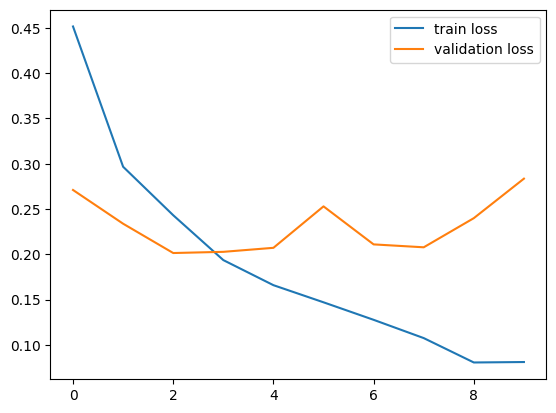

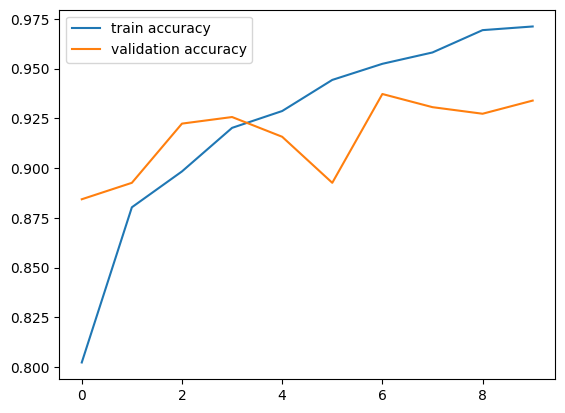

In [44]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/test.jpg


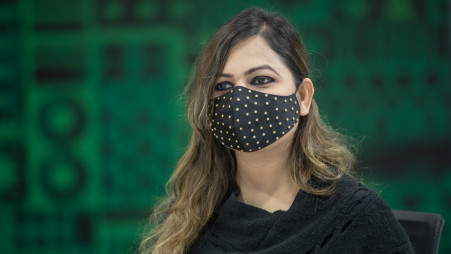

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step
[[0.35842997 0.6591824 ]]
1
The person is wearing a mask


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person is wearing a mask')

else:

  print('The person is not wearing a mask')